# Segundo trabalho de Projeto e Análise de Algoritmos : Análise comparativa dos algoritmos de Árvore Geradora Mínima de Kruskal e Prim - implementação em python


<h2>Integrantes da dupla:</h2>
<h5>Clarisse Midori Yoshimura Torres</h5>
<h5>Maria Carolina Tomain Rodrigues</h5>

## Objetivos

O presente trabalho tem como foco a implementação comparativa dos algortimos de Kruskel e Prim, de modo que através da mensuração de tempo e visualização gráfica, seja possível avaliar o desempenho relativo de ambas implementações em diferentes volumes de entrada. 
<br>

## Introdução

### Algoritmo de Kruskal e Union-Find

A árvore geradora mínima de Kruskal parte de uma aresta segura para desenvolver a floresta em formação. A partir desse elemento inicial, a cada etapa, o algoritmo verifica entre todas as arestas que conectam duas árvores do grafo aquela que possuí o __peso mínimo__ e que não forma um ciclo com as arestas já selecionadas.<br>
O algoritmo possuí uma abordagem __gulosa__ e seu tempo de execução é de __O(E logE)__, sendo E o número de arestas a serem ordenadas.
<br>
Além disso, para que seja possível para o algoritmo realizar tais operações, a árvore geradora mínima de Kruskal utiliza de estruturas denominadas __Union-Find__.
<br>
### Union-Find
A estrutura Union-Find é utilizada para gerenciar conjntos de elementos que não possuem elementos na intersecção. Para tal manutenção de subconjuntos, a estrutura utiliza das operações __Find__ e __Union__, responsáveis por determinar para qual subconjunto o elemento deverá er direcionado e por unir dois subconjuntos em um único, respectivamente.  
<br>
Devido a natureza da árvore geradora mínima de Kruskal, o algoritmo necessita da estrutura Union-Find para gerenciar os subconjuntos de arestas presentes no gráfico. Dessa forma, essa estrutura é responsável por evitar a formação de ciclos durante a construção da floresta, verificando se os dois vértices que são conectados pela aresta estão no mesmo subconjunto, se não estiverem, a aresta é adicionada à árvore e os vértices são unidos em um único conjunto. 

### Algoritmo de Prim

Diferente da abordagem do algoritmo de Kruskal, o algoritmo de Prim é inicializado a partir de um vértice arbitrário, expandindo a AGM a partir da selecção dinâmica das arestas de um grafo. A cada etapa, o algoritmo seleciona a aresta de __menor peso__ que conecta um vértice já incluído na árvore com um vértice ainda não incluso no subconjunto. 
<br><br>
Bem como o algoritmo de Kruskal, a árvore geradora mínima de Prim possuí uma abordagem __gulosa__ e complexidade de __O(ElogV)__, sendo __E o numero de arestas__ e __V o número de vértices__ do grafo.
<br><br>
Para realizar tal abordagem, o algoritmo de Prim utiliza de uma __fila de prioridades__ para auxiliar na seleção da aresta de menor peso.
<br>

### Fila de prioridade
Uma fila de prioridade pe uma estrutura de dados que permite armazenar dados a partir da associação de chaves. Cada elemento tem uma prioridade de modo que o elemento de maior ou menor prioridade é extraído da fila. Para realizar tal operação, a fila de prioridade consome um tempo de __O(logn)__ e utiliza de um __heap máximo ou mínimo (como é o caso do algoritmo de Prim)__.
<br><br>
Com isso, a fila é responsável por ordenar as arestas e determinar qual será o próximo vértice a ser adicionado na árvore que contrnha o menor custo (peso) de aresta em um tempo de __O(logn)__.

## Funções auxiliares 

### Geradores e Visualizadores de grafos

In [2]:
import random

# Função para gerar um grafo esparso (aproximadamente E = V - 1 arestas)
def gerar_grafo_esparso(n, max_arestas=None):
    # Gera uma árvore (n-1 arestas) para garantir a conectividade
    arestas = []
    for i in range(1, n):
        arestas.append((i - 1, i))  # Conectando em linha, garantindo a conectividade
    
    # Se há mais arestas para adicionar, adicione aleatoriamente
    if max_arestas:
        while len(arestas) < max_arestas:
            u = random.randint(0, n - 1)
            v = random.randint(0, n - 1)
            if u != v and (u, v) not in arestas and (v, u) not in arestas:
                arestas.append((u, v))
    
    return arestas

# Função para gerar um grafo denso (aproximadamente E = V*(V-1)/2 arestas)
def gerar_grafo_denso(n, max_arestas=None):
    # Lista de todas as possíveis arestas entre os vértices
    arestas = [(i, j) for i in range(n) for j in range(i+1, n)]
    
    # Se houver um número máximo de arestas, selecione aleatoriamente as arestas
    if max_arestas:
        arestas = random.sample(arestas, max_arestas)
    
    return arestas

# Função para visualizar o grafo de forma simples (aresta por aresta)
def visualizar_grafo(arestas):
    for u, v in arestas:
        print(f"Aresta: {u} - {v}")

# Exemplo de uso:

# Gerando um grafo esparso com 10 vértices e no máximo 15 arestas
n = 10
max_arestas_esparsas = 15
grafo_esparso = gerar_grafo_esparso(n, max_arestas_esparsas)
print("Grafo Esparso:")
visualizar_grafo(grafo_esparso)

print("\n" + "="*30 + "\n")

# Gerando um grafo denso com 10 vértices e no máximo 40 arestas
max_arestas_densas = 40
grafo_denso = gerar_grafo_denso(n, max_arestas_densas)
print("Grafo Denso:")
visualizar_grafo(grafo_denso)


Grafo Esparso:
Aresta: 0 - 1
Aresta: 1 - 2
Aresta: 2 - 3
Aresta: 3 - 4
Aresta: 4 - 5
Aresta: 5 - 6
Aresta: 6 - 7
Aresta: 7 - 8
Aresta: 8 - 9
Aresta: 3 - 9
Aresta: 7 - 0
Aresta: 2 - 9
Aresta: 1 - 3
Aresta: 4 - 6
Aresta: 8 - 1


Grafo Denso:
Aresta: 4 - 9
Aresta: 0 - 4
Aresta: 1 - 9
Aresta: 6 - 8
Aresta: 1 - 4
Aresta: 1 - 3
Aresta: 0 - 1
Aresta: 2 - 5
Aresta: 0 - 2
Aresta: 3 - 8
Aresta: 1 - 7
Aresta: 2 - 6
Aresta: 1 - 5
Aresta: 0 - 9
Aresta: 2 - 8
Aresta: 2 - 7
Aresta: 7 - 8
Aresta: 2 - 4
Aresta: 6 - 7
Aresta: 1 - 2
Aresta: 2 - 3
Aresta: 0 - 3
Aresta: 4 - 5
Aresta: 3 - 4
Aresta: 5 - 6
Aresta: 5 - 7
Aresta: 7 - 9
Aresta: 3 - 6
Aresta: 3 - 7
Aresta: 0 - 5
Aresta: 1 - 8
Aresta: 4 - 7
Aresta: 0 - 8
Aresta: 5 - 8
Aresta: 5 - 9
Aresta: 6 - 9
Aresta: 3 - 5
Aresta: 8 - 9
Aresta: 4 - 8
Aresta: 2 - 9


### Funções para plotar gráficos

#### Plot de gráficos individuais

In [3]:
import statistics # utilizada para auxiliar no calculo da média de tempo
import numpy as np # utilizada para auziliar em operações na plotagem dos gráficos
import matplotlib.pyplot as plt # utilizada para plotar os gráficos
from matplotlib.ticker import FormatStrFormatter # utilizada para auxiliar na plotagem dos gráficos

def constroiGrafico(x,y, intervalo, titulo):

    xi = list(range(len(x)))
    
    fig, ax = plt.subplots(figsize=(8,8))
    ax.spines['bottom'].set_visible(False)
    plt.plot(xi, y,marker=".", linestyle='-', color='r', label=f'Tempox Entrada') 
    plt.xlabel('Tamanho do grafo de entrada (Nº de vértices)')
    plt.ylabel('Tempo Médio de Execução(segundos)') 
    plt.title(f'Relação entre tamanho da entrada e o tempo de consumo: {titulo}')
    ax.set_ylim(0, y[6]+intervalo)
    ax.set_yticks(np.arange(y[0],y[6], intervalo))
    plt.xticks(xi, x)
    
    ax.grid(True)

#### Plot de gráficos comparativos - Grafos Densos e Esparsos

In [4]:
import statistics # utilizada para auxiliar no calculo da média de tempo
import numpy as np # utilizada para auziliar em operações na plotagem dos gráficos
import matplotlib.pyplot as plt # utilizada para plotar os gráficos
from matplotlib.ticker import FormatStrFormatter # utilizada para auxiliar na plotagem dos gráficos

def constroiGraficoCompara(y1,y2,intervalo, titulo):
    x = [10, 100, 500, 1000, 2000, 5000, 10000] # valores do número de vértices
    
    fig, ax = plt.subplots(figsize=(8,8))
    
    # legendas e apresentação
    plt.xlabel('Tamanho do grafo de entrada (Nº de vértices)')
    plt.ylabel('Tempo Médio de Execução dos algoritmos de AGM (em segundos)') 
    plt.title(f'Relação entre tamanho da entrada e o tempo de consumo: {titulo}')
    ax.spines['bottom'].set_visible(False)
    ax.grid(True) 
    
    #definir limites do gráfico de comparação
    maior = max(y1[6],y2[6])
    menor = min(y1[0],y2[0])
    
    #x - define os intervalos por tick
    xi = list(range(len(x)))
    plt.xticks(xi, x)
    
    #y
    ax.set_ylim(menor, maior)
    ax.set_yticks(np.arange(menor,maior+intervalo, intervalo))
    
    #plotar y1 : grafos densos
    plt.plot(xi, y1,marker="^", linestyle='-', color='r', label='tempo das entradas testadas')
    
    #plotar y2 : grafos esparsos
    plt.plot(xi, y2,marker="o", linestyle='-', color='b', label='tempo das entradas testadas')
    

    plt.legend(['Grafos Densos','Grafos Esparsos'])
    plt.show()

## Algoritmos de Árvores Geradoras Mínimas

### Algoritmo de Kruskal

In [5]:
class UnionFind:
    def __init__(self, n):
        self.parent = list(range(n))  # Cada nó é seu próprio pai inicialmente
        self.rank = [0] * n            # Rank inicial é 0

    def find(self, x):
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])  # Compressão de caminho
        return self.parent[x]

    def union(self, x, y):
        rootX = self.find(x)
        rootY = self.find(y)
        
        if rootX != rootY:
            # União por rank
            if self.rank[rootX] > self.rank[rootY]:
                self.parent[rootY] = rootX
            elif self.rank[rootX] < self.rank[rootY]:
                self.parent[rootX] = rootY
            else:
                self.parent[rootY] = rootX
                self.rank[rootX] += 1

def kruskal(n, edges):
    # Inicializa a estrutura Union-Find
    uf = UnionFind(n)
    
    # Ordena as arestas pela sua distância (peso)
    edges.sort(key=lambda edge: edge[2])  # (u, v, peso)
    
    mst = []  # Lista para armazenar as arestas da Árvore Geradora Mínima
    mst_weight = 0  # Peso total da AGM
    
    for u, v, weight in edges:
        # Verifica se a aresta conecta dois componentes disjuntos
        if uf.find(u) != uf.find(v):
            uf.union(u, v)  # Une os componentes
            mst.append((u, v, weight))  # Adiciona a aresta à AGM
            mst_weight += weight  # Atualiza o peso total da AGM
    
    return mst, mst_weight

# Exemplo de uso
n = 4  # Número de vértices
edges = [
    (0, 1, 10), (0, 2, 6), (0, 3, 5),
    (1, 3, 15), (2, 3, 4)
]  # Lista de arestas no formato (u, v, peso)

mst, mst_weight = kruskal(n, edges)

print("Árvore Geradora Mínima:", mst)
print("Peso total da AGM:", mst_weight)

Árvore Geradora Mínima: [(2, 3, 4), (0, 3, 5), (0, 1, 10)]
Peso total da AGM: 19


### Algoritmo de Prim

In [6]:
import heapq  # Biblioteca para heap mínimo

def prim(n, graph):
    # n: número de vértices
    # graph: lista de adjacência representando o grafo (vértice, peso)
    
    # Inicialização dos dados
    min_heap = [(0, 0)]  # (peso, vértice) - começa com vértice 0 e peso 0
    in_mst = [False] * n  # Marca se o vértice está na Árvore Geradora Mínima (AGM)
    mst = []  # Lista das arestas na AGM
    total_weight = 0  # Peso total da AGM
    
    while min_heap:
        weight, u = heapq.heappop(min_heap)  # Extrai o vértice de menor peso
        if in_mst[u]:  # Se já estiver na AGM, ignora
            continue
        
        in_mst[u] = True  # Marca o vértice como parte da AGM
        total_weight += weight  # Atualiza o peso total da AGM
        
        # Adiciona a aresta (se não for o vértice inicial)
        if weight > 0:
            mst.append((u, weight))
        
        # Explora os vizinhos de u
        for v, w in graph[u]:
            if not in_mst[v]:  # Se v não está na árvore ainda
                heapq.heappush(min_heap, (w, v))  # Coloca v na fila de prioridades
    
    return mst, total_weight

# Exemplo de uso
n = 5  # Número de vértices
graph = [
    [(1, 2), (3, 6)],  # Vértice 0: (vértice 1, peso 2), (vértice 3, peso 6)
    [(0, 2), (2, 3), (3, 8), (4, 5)],  # Vértice 1: (vértice 0, peso 2), (vértice 2, peso 3), (vértice 3, peso 8), (vértice 4, peso 5)
    [(1, 3), (4, 7)],  # Vértice 2: (vértice 1, peso 3), (vértice 4, peso 7)
    [(0, 6), (1, 8), (4, 9)],  # Vértice 3: (vértice 0, peso 6), (vértice 1, peso 8), (vértice 4, peso 9)
    [(1, 5), (2, 7), (3, 9)]   # Vértice 4: (vértice 1, peso 5), (vértice 2, peso 7), (vértice 3, peso 9)
]

mst, mst_weight = prim(n, graph)

print("Árvore Geradora Mínima:", mst)
print("Peso total da AGM:", mst_weight)


Árvore Geradora Mínima: [(1, 2), (2, 3), (4, 5), (3, 6)]
Peso total da AGM: 16


## Função de medição de tempo dos algoritmos

In [7]:
# Função para medir o tempo de execução dos algoritmos
def medir_tempo_execucao(grafo, algoritmo, n):
    start_time = time.perf_counter()
    if algoritmo == "kruskal":
        # Para Kruskal, as arestas precisam ter pesos aleatórios
        arestas = [(u, v, random.randint(1, 100)) for u, v in grafo]
        kruskal(n, arestas)
    elif algoritmo == "prim":
        # Para Prim, as arestas precisam ter pesos aleatórios
        arestas = [(u, v, random.randint(1, 100)) for u, v in grafo]
        prim(n, arestas)
    end_time = time.perf_counter()
    return end_time - start_time

## Teste de todas as funcionalidades pedidas:

In [24]:
# Lista de tamanhos de grafos para testar (vértices)
tamanhos = [10, 100, 500, 1000, 2000, 5000, 10000]

# Teste em grafos esparsos e densos
for n in tamanhos:
    print(f"Testando com {n} vértices:")
    
    # Grafo Esparso
    grafo_esparso = gerar_grafo_esparso(n, max_arestas=n-1)
    tempo_kruskal_esparso = medir_tempo_execucao(grafo_esparso, "kruskal", n)
    tempo_prim_esparso = medir_tempo_execucao(grafo_esparso, "prim", n)
    print(f"Grafo Esparso - Kruskal: {tempo_kruskal_esparso:.6f} segundos")
    print(f"Grafo Esparso - Prim: {tempo_prim_esparso:.6f} segundos")
    
    # Grafo Denso
    grafo_denso = gerar_grafo_denso(n, max_arestas=(n*(n-1))//2)
    tempo_kruskal_denso = medir_tempo_execucao(grafo_denso, "kruskal", n)
    tempo_prim_denso = medir_tempo_execucao(grafo_denso, "prim", n)
    print(f"Grafo Denso - Kruskal: {tempo_kruskal_denso:.6f} segundos")
    print(f"Grafo Denso - Prim: {tempo_prim_denso:.6f} segundos")
    
    print("="*50)


Testando com 10 vértices:
Grafo Esparso - Kruskal: 0.000227 segundos
Grafo Esparso - Prim: 0.000097 segundos
Grafo Denso - Kruskal: 0.000326 segundos
Grafo Denso - Prim: 0.000287 segundos
Testando com 100 vértices:
Grafo Esparso - Kruskal: 0.000835 segundos
Grafo Esparso - Prim: 0.000527 segundos
Grafo Denso - Kruskal: 0.020464 segundos
Grafo Denso - Prim: 0.024436 segundos
Testando com 500 vértices:
Grafo Esparso - Kruskal: 0.002430 segundos
Grafo Esparso - Prim: 0.001515 segundos
Grafo Denso - Kruskal: 0.537506 segundos
Grafo Denso - Prim: 0.471110 segundos
Testando com 1000 vértices:
Grafo Esparso - Kruskal: 0.004508 segundos
Grafo Esparso - Prim: 0.003774 segundos
Grafo Denso - Kruskal: 2.228465 segundos
Grafo Denso - Prim: 1.979173 segundos
Testando com 2000 vértices:
Grafo Esparso - Kruskal: 0.011018 segundos
Grafo Esparso - Prim: 0.008934 segundos
Grafo Denso - Kruskal: 9.462918 segundos
Grafo Denso - Prim: 8.757226 segundos
Testando com 5000 vértices:
Grafo Esparso - Kruskal: 0

## Plotagem e Análise dos resultados

In [8]:
# vetores auxiliares de resultados de consumo de tempo médio - grafos densos e esparsos
# armazenar os resultados obtidos para plotagem (em segundos):
# 10, 100, 500, 1000, 2000, 5000, 10000
X=[10, 100, 500, 1000, 2000, 5000, 10000]
ARRAY_KRUSKAL_DENSO = [0.000326, 0.020464, 0.537506, 2.228465, 9.462918, 69.343569, 280.271042]
ARRAY_KRUSKAL_ESPARSO = [0.000227, 0.000835, 0.002430, 0.004508, 0.011018, 0.030693, 0.057776]
ARRAY_PRIM_DENSO = [0.000287, 0.024436, 0.471110, 1.979173, 8.757226, 63.509979, 342.290669]
ARRAY_PRIM_ESPARSO = [0.000097, 0.000527, 0.001515, 0.003774, 0.008934, 0.020873, 0.041975]

### 1. Gráficos para o algoritmo de Kruskal

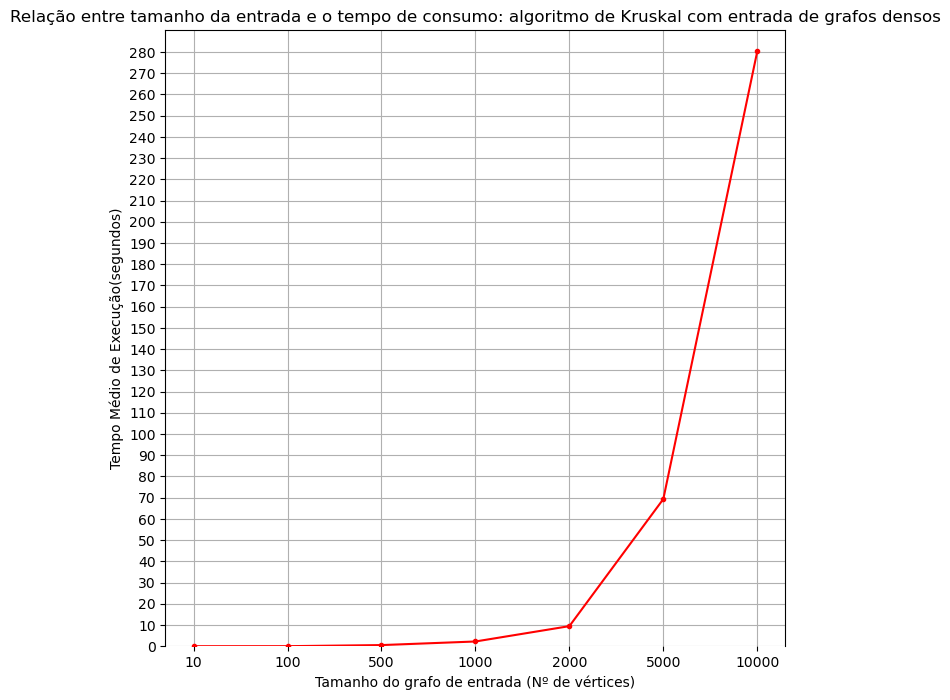

In [9]:
constroiGrafico(X,ARRAY_KRUSKAL_DENSO,10,'algoritmo de Kruskal com entrada de grafos densos')

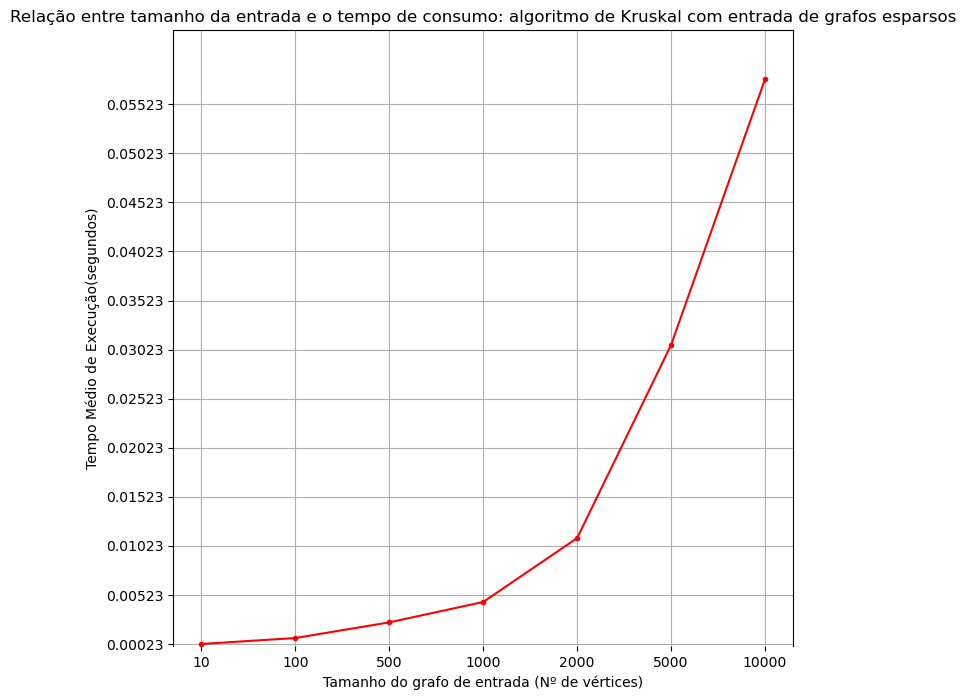

In [10]:
constroiGrafico(X,ARRAY_KRUSKAL_ESPARSO,0.005,'algoritmo de Kruskal com entrada de grafos esparsos')

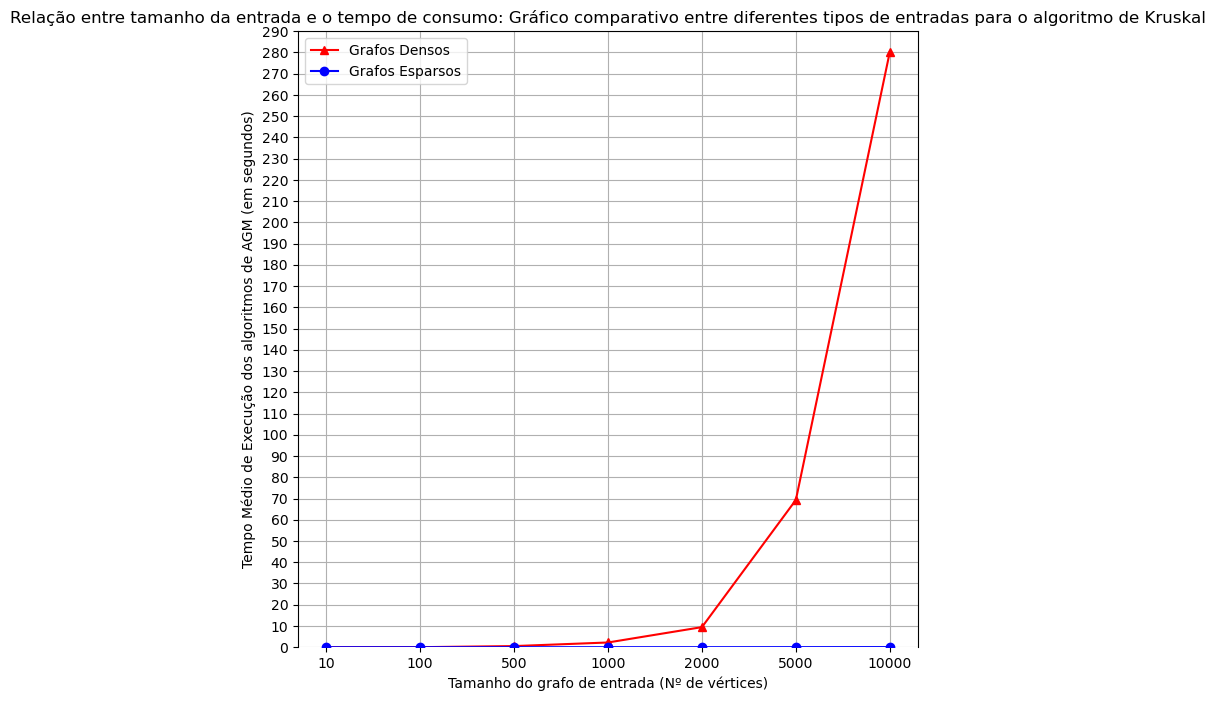

In [11]:
titulo = 'Gráfico comparativo entre diferentes tipos de entradas para o algoritmo de Kruskal'
constroiGraficoCompara(ARRAY_KRUSKAL_DENSO,ARRAY_KRUSKAL_ESPARSO,10,titulo)

### 2. Gráficos para o algoritmo de Prim

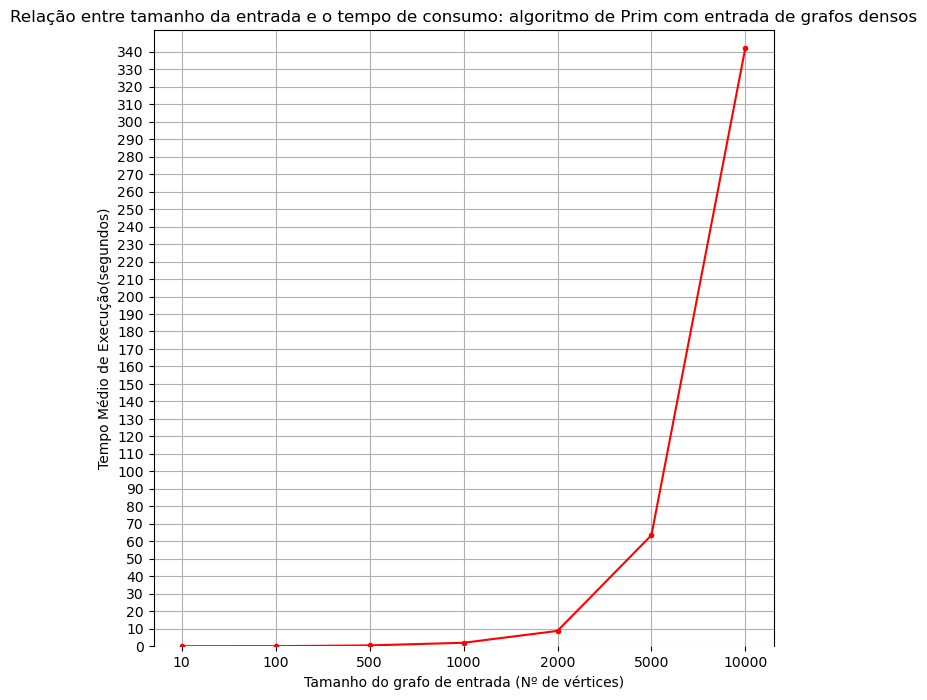

In [12]:
constroiGrafico(X,ARRAY_PRIM_DENSO,10,'algoritmo de Prim com entrada de grafos densos')

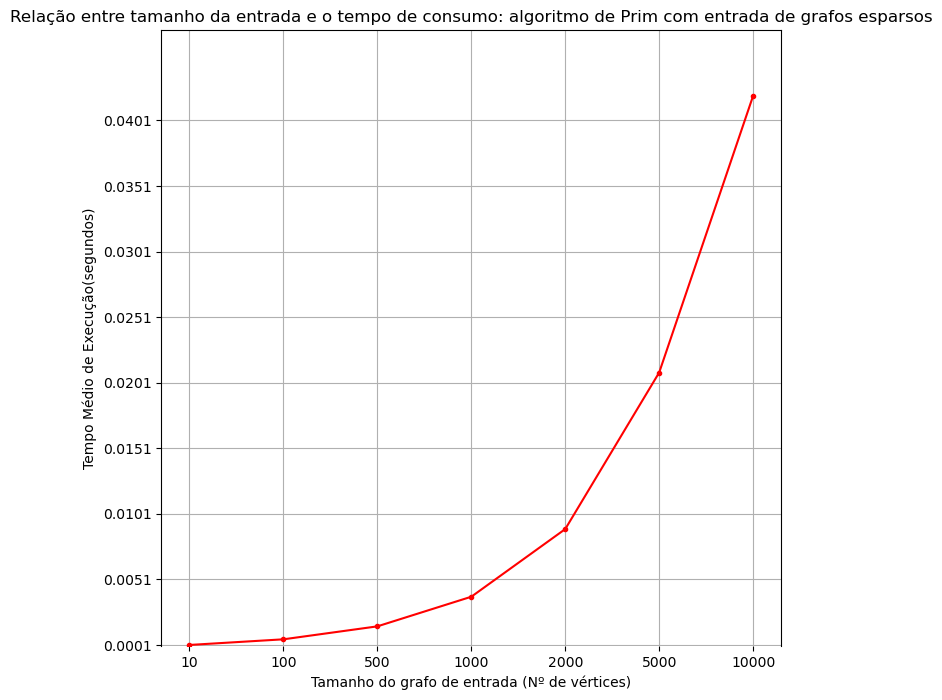

In [13]:
constroiGrafico(X,ARRAY_PRIM_ESPARSO,0.005,'algoritmo de Prim com entrada de grafos esparsos')

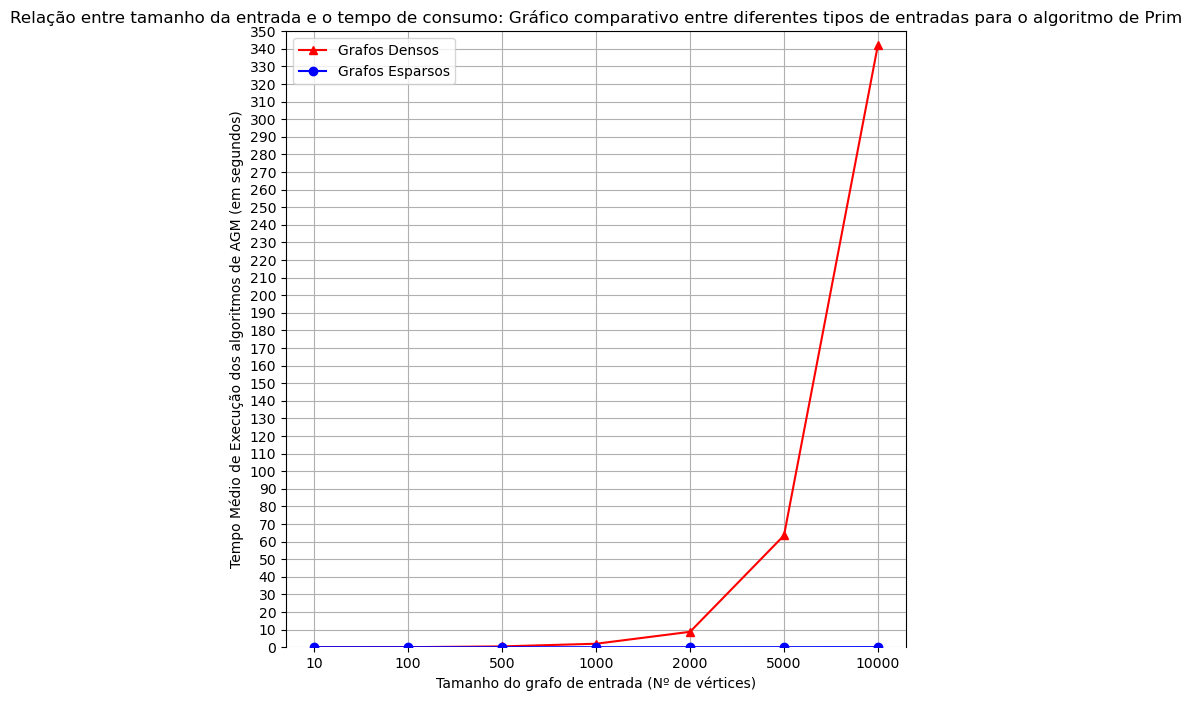

In [14]:
titulo = 'Gráfico comparativo entre diferentes tipos de entradas para o algoritmo de Prim'
constroiGraficoCompara(ARRAY_PRIM_DENSO,ARRAY_PRIM_ESPARSO,10,titulo)

### 3. Análise comparativa entre os dois algoritmos

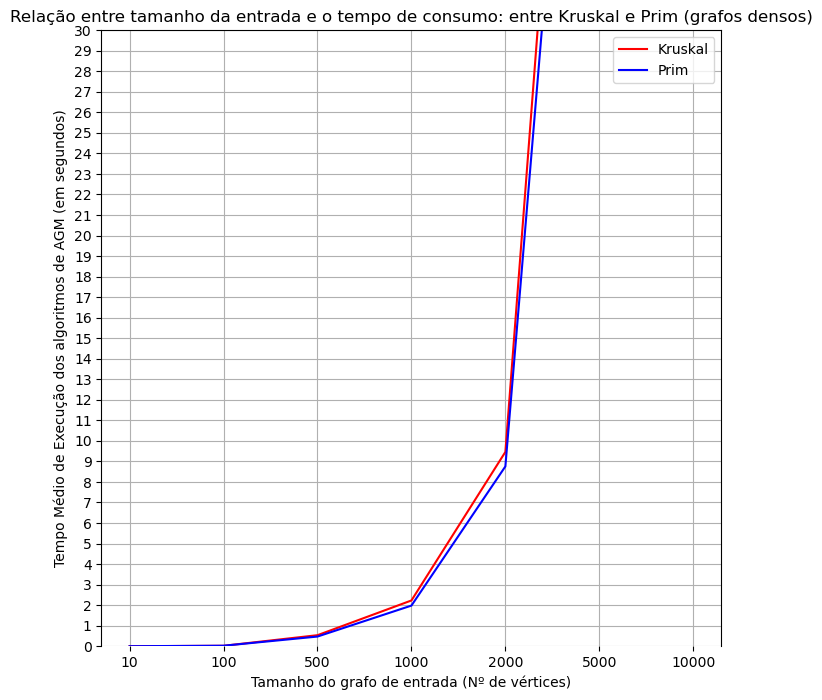

In [15]:
    # definir os eixos x e y
    y1 = ARRAY_KRUSKAL_DENSO # countingsort
    y2 = ARRAY_PRIM_DENSO # radixsort
     
    fig, ax = plt.subplots(figsize=(8,8))
    
    # legendas e apresentação
    plt.xlabel('Tamanho do grafo de entrada (Nº de vértices)')
    plt.ylabel('Tempo Médio de Execução dos algoritmos de AGM (em segundos)') 
    plt.title('Relação entre tamanho da entrada e o tempo de consumo: entre Kruskal e Prim (grafos densos)')
    ax.spines['bottom'].set_visible(False)
    ax.grid(True) 
    
    #definir limites do gráfico de comparação
    maior = 30
    menor = 0
    intervalo = 1
    
    #x
    xi = list(range(len(X)))
    plt.xticks(xi, X)
    
    #y
    ax.set_ylim(menor, maior)
    ax.set_yticks(np.arange(menor,maior+intervalo, intervalo))
    
    #plotar y1 : Kruskal
    plt.plot(xi, y1, linestyle='-', color='r', label='Kruskal')
    
    #plotar y2 : Prim
    plt.plot(xi, y2, linestyle='-', color='b', label='Prim')
    
    plt.legend(['Kruskal','Prim'])
    plt.show()

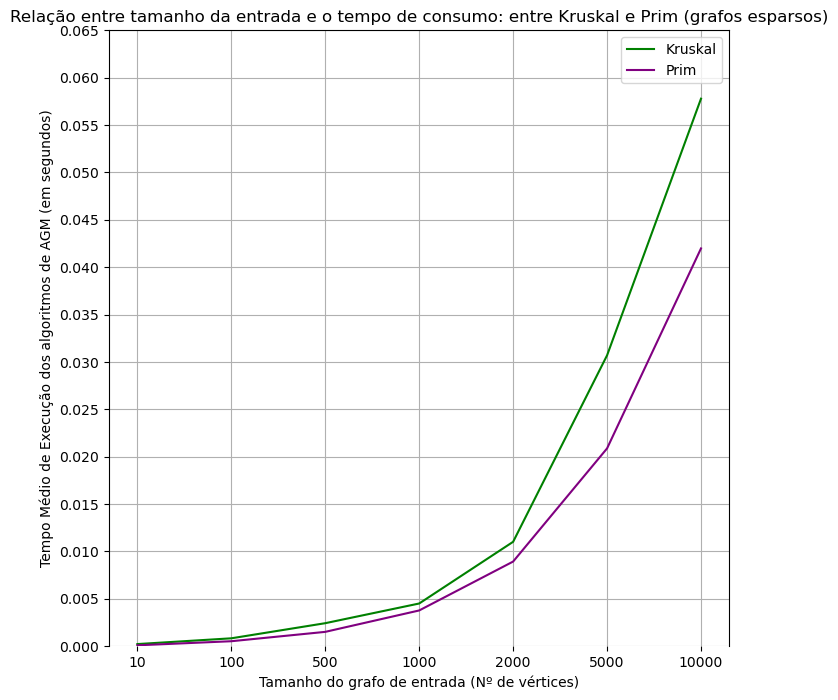

In [16]:
    # definir os eixos x e y
    y1 = ARRAY_KRUSKAL_ESPARSO # countingsort
    y2 = ARRAY_PRIM_ESPARSO # radixsort
     
    fig, ax = plt.subplots(figsize=(8,8))
    
    # legendas e apresentação
    plt.xlabel('Tamanho do grafo de entrada (Nº de vértices)')
    plt.ylabel('Tempo Médio de Execução dos algoritmos de AGM (em segundos)') 
    plt.title('Relação entre tamanho da entrada e o tempo de consumo: entre Kruskal e Prim (grafos esparsos)')
    ax.spines['bottom'].set_visible(False)
    ax.grid(True) 
    
    #definir limites do gráfico de comparação
    intervalo = 0.005
    maior = max(y1[6],y2[6])+intervalo
    menor = 0
    
    #x
    xi = list(range(len(X)))
    plt.xticks(xi, X)
    
    #y
    ax.set_ylim(menor, maior)
    ax.set_yticks(np.arange(menor,maior+intervalo, intervalo))
    
    #plotar y1 : Kruskal
    plt.plot(xi, y1, linestyle='-', color='g', label='Kruskal')
    
    #plotar y2 : Prim
    plt.plot(xi, y2, linestyle='-', color='purple', label='Prim')
    
    plt.legend(['Kruskal','Prim'])
    plt.show()

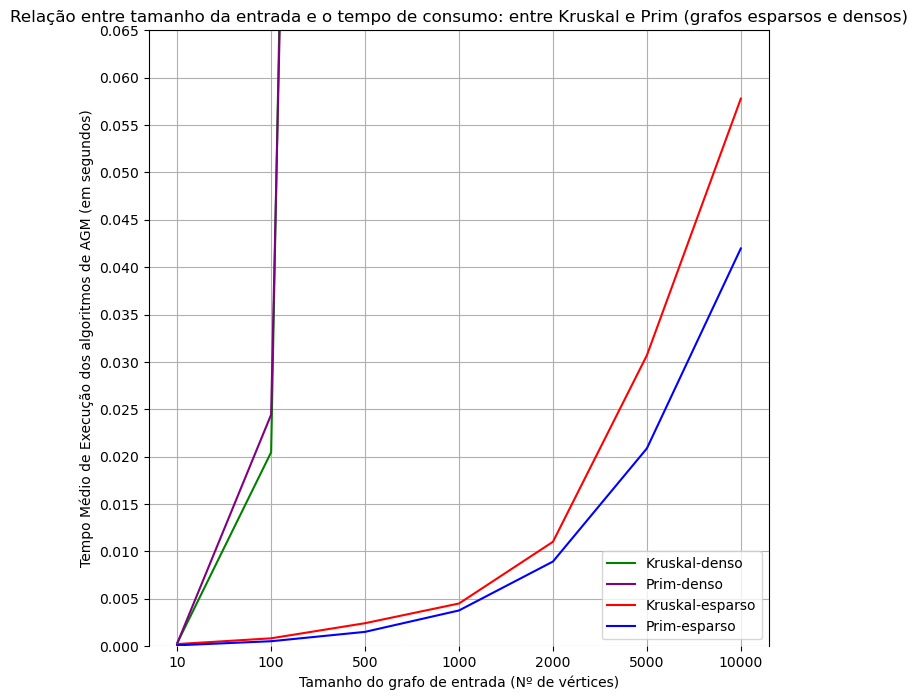

In [17]:
    # definir os eixos x e y
    y1 = ARRAY_KRUSKAL_ESPARSO 
    y2 = ARRAY_PRIM_ESPARSO 
    y3 = ARRAY_KRUSKAL_DENSO 
    y4 = ARRAY_PRIM_DENSO 
     
    fig, ax = plt.subplots(figsize=(8,8))
    
    # legendas e apresentação
    plt.xlabel('Tamanho do grafo de entrada (Nº de vértices)')
    plt.ylabel('Tempo Médio de Execução dos algoritmos de AGM (em segundos)') 
    plt.title('Relação entre tamanho da entrada e o tempo de consumo: entre Kruskal e Prim (grafos esparsos e densos)')
    ax.spines['bottom'].set_visible(False)
    ax.grid(True) 
    
    #definir limites do gráfico de comparação
    intervalo = 0.005
    maior = max(y1[6],y2[6])+intervalo
    menor = 0
    
    #x
    xi = list(range(len(X)))
    plt.xticks(xi, X)
    
    #y
    ax.set_ylim(menor, maior)
    ax.set_yticks(np.arange(menor,maior+intervalo, intervalo))
    
    #plotar y1 : Kruskal
    plt.plot(xi, y3, linestyle='-', color='g', label='Kruskal')
    
    #plotar y2 : Prim
    plt.plot(xi, y4, linestyle='-', color='purple', label='Prim')
    
    #plotar y1 : Kruskal
    plt.plot(xi, y1, linestyle='-', color='r', label='Kruskal')
    
    #plotar y2 : Prim
    plt.plot(xi, y2, linestyle='-', color='b', label='Prim')
    
    plt.legend(['Kruskal-denso','Prim-denso','Kruskal-esparso','Prim-esparso'])
    plt.show()

Logo, analisando os gráficos dispostos acima, é notável que a diferença de desempenho dos algoritmos está diretamente relacionada com o tipo de entrada dos grafos, de modo que os gráficos dos algoritmos de Kruskel e Prim são exponencialmente superiores para grafos densos, com um crescimento um pouco mais rápido para o algoritmo de Prim, enquanto para entradas de grafos esparsos, tal crescimento é mais lento e gradativo, ficando evidente em uma escala maior, como ocorre nos gráficos de comparação enre as entradas para Prim e Kruskel (pois para etradas esparsas a representação gráfica é quase constante se relativa as entradas densas).   